Code version
* Date Created: 02-04-2021
* Main Author: Awmnah Asad
* Colaborators: Awmnah Asad, Ersegun Kocoglu, Najih Shabir, Ricardo Luhm

In [2]:
%matplotlib inline 
### Ok I can plot in Jupyter/Colab/Github

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from time import time ### Check here
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular
from tqdm import tqdm
import sympy as sp
from sympy import init_printing

In [3]:
norms = []
#for k in tqdm(range(100,1000,100), position=0):
for k in tqdm(range(100,1000,200), position=0):

  ### range(start=100,stop=1000,step=100)
  #print("my k= {}".format(k))
  ### k is the shape of your matrix
  ### where shape = rows, columns
  ### since it is a square matrix then we will have a k,k matrix
  ### Current
  #sample = np.random.normal(loc = 0, scale = k, size=(k, k))

  # sample = np.random.normal(loc = 0, scale = 1, size=(k, k))
  sample =np.random.uniform(low=-1.0, high=1.0, size=(k,k))
  """
  variants of triangular matrix
  a = np.triu(sample) +
  a = np.tril(sample) +
  a = np.triu(sample, 1) - becouse singular matrix 
  a = np.triu(sample, -1) - not equal
  """
  a = np.triu(sample) ### nullify lower triangle
  b = np.random.normal(loc = 0, scale=1, size=(k))

  xSimple = np.linalg.solve(a, b)
  xTriangular = solve_triangular(a, b)
  deltaX = xSimple - xTriangular

  normDelta = np.linalg.norm(deltaX)
  sub = []
  sub.append(k) ### k = 100 -> sub = [100]
  sub.append(normDelta) ### normDelta = ??? -> sub = [100,normDelta]
  norms.append(sub) ### norms = [ [100,normDelta] ]  -> norms = [ [100,normDelta100], [200,normDelta200] ] 
#   print("iteration {} - normDelta={}  - ".format(k, normDelta))

100%|██████████| 5/5 [00:00<00:00, 32.19it/s]


In [4]:
SolveTime = []
SolveTriangularTime = []

for k in tqdm(range(100,1100,100), position=0):
    sample = np.random.normal(loc = 0, scale = k, size=(k, k))
    # sample = np.random.normal(loc = 0, scale = 1, size=(k, k))

    """
    variants of triangular matrix
    a = np.triu(sample) +
    a = np.tril(sample) +
    a = np.triu(sample, 1) - becouse singular matrix 
    a = np.triu(sample, -1) - not equal
    """
    a = np.triu(sample)
    # b = np.random.normal(loc = 0, scale=1, size=(k))
    xTrue = np.ones(k)
    b = a @ xTrue

    # compute time
    start_time = time()
    xSimple = np.linalg.solve(a, b)
    end_time = time()
    timeres = end_time-start_time
    SolveTime.append(timeres)

    start_time =time()
    xTriangular = solve_triangular(a, b)
    end_time = time()
    timeres = end_time-start_time
    SolveTriangularTime.append(timeres)

100%|██████████| 10/10 [00:00<00:00, 22.42it/s]


In [5]:
# First number is matrix size. The second number is norm delta of the solutions
norms[:10]

[[100, 43452883527.120514],
 [300, 1.1427968152046095e+65],
 [500, 8.142274674431691e+122],
 [700, 1.1008279208154259e+148],
 [900, inf]]

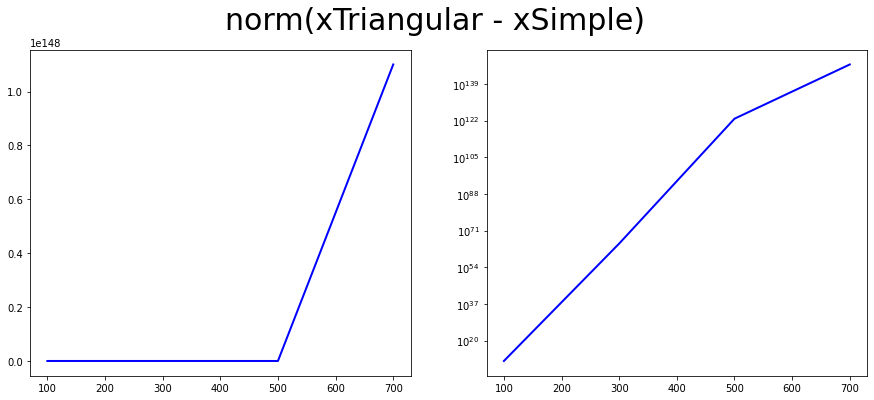

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

#### axN.plot (x,y, color = "color_name", label = "Norm", lw = "line_width" )
### instead of *zip(*norms) -> x = [3,4,5,6,...], y = [1.831026719408895e-15, ...]
### we can create norms_array = np.array(norms)

norms_array = np.array(norms)
x = norms_array[:,0]
y = norms_array[:,1]

x1, x2 = zip(*norms)
### [rows,columns]
### [0,0] first row and first column
### [:,0] all the rows but only the first column
### [:,1] all the rows but only the second column

ax1.plot(*zip(*norms), color='blue', lw=2)
# Setting a logarithmic scale for y-axis

ax2.plot(*zip(*norms), color='blue', lw=2)
# ax2.yscale('log')
ax2.set_yscale('log')
fig.suptitle("norm(xTriangular - xSimple)", fontsize = 30)
fig.show()

In [7]:
def getMatrixParams(a, k, mode='norm'):
    start_time = time()
    result = 0
    
    if mode=='norm':
        result = np.linalg.norm(a)
    elif mode=='det':
        result = abs(np.linalg.det(a))
    elif mode=='cond':
        result = np.linalg.cond(a, p=2)
    if result == np.inf:
        result = np.array(2**(1000)).astype(np.float)
    end_time = time()
    sp.Matrix(a)
    timeres = end_time-start_time
    init_printing()
    return [k, result], timeres

In [8]:
normsD = []
normsSimple = []
normsTrinangular = []

normMatrix = []

dets = []
# detsSimple = []
# detsTrinangular = []

conds = []
# condsSimple = []
# condsTrinangular = []

# times variable
normTime = []
normsSimpleTime = []
normsTrinangularTime = []

detsMatrixTime = []
condsMatrixTime = []
normsMatrixTime = []

In [9]:
#for k in tqdm(range(100,1100,100), position=0):
for k in tqdm(range(100,1100,200), position=0):
  #print("my k= {}".format(k))

  ### New update Slice
  sample = np.random.normal(loc = 0, scale = k, size=(k, k))
  a = np.triu(sample)
  xTrue = np.ones(k)
  b = a @ xTrue
  xSimple = np.linalg.solve(a, b)
  xTriangular = solve_triangular(a, b)
  ### Slice

  deltaX = xSimple - xTriangular
  errorSimple = xTrue-xSimple
  errorTriangular = xTrue-xTriangular
  #errorSimple = xSimple - xTrue
  #errorTriangular = xTriangular - xTrue

  #[k, result], timeres = getMatrixParams(a, k, mode='norm')
  f,d = getMatrixParams(deltaX, k, "norm")
  normsD.append(f)

  normTime.append(d)

  f,d = getMatrixParams(errorSimple, k, "norm")
  normsSimple.append(f)
  normsSimpleTime.append(d)

  f,d = getMatrixParams(errorTriangular, k, "norm")
  normsTrinangular.append(f)
  normsTrinangularTime.append(d)

  # normTime = []
  # normsSimpleTime = []
  # normsTrinangularTime = []

  # dets.append(getMatrixParams(deltaX, k, "det"))
  # detsSimple.append(getMatrixParams(errorSimple, k, "det"))
  # detsTrinangular.append(getMatrixParams(errorTriangular, k, "det"))

  # conds.append(getMatrixParams(deltaX, k, "cond"))
  # condsSimple.append(getMatrixParams(errorSimple, k, "cond"))
  # condsTrinangular.append(getMatrixParams(errorTriangular, k, "cond"))

  f, d = getMatrixParams(a, k, "det")
  dets.append(f)
  detsMatrixTime.append(d)

  f, d = getMatrixParams(a, k, "cond")
  conds.append(f)
  condsMatrixTime.append(d)

  f, d = getMatrixParams(a, k, "norm")
  normMatrix.append(f)
  normsMatrixTime.append(d)

 20%|██        | 1/5 [00:01<00:05,  1.43s/it]/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
100%|██████████| 5/5 [03:12<00:00, 38.54s/it]


In [10]:
normsSimple

[[100, 1.127970363406742e+17],
 [300, 1.532870234819828e+75],
 [500, 4.429350718864237e+138],
 [700, array(1.07150861e+301)],
 [900, array(1.07150861e+301)]]

In [11]:
print(type(normsSimple),type(normsSimple[0]),type(normsSimple[0][0]))

<class 'list'> <class 'list'> <class 'int'>


In [12]:
normsSimple2 =np.array(normsSimple).astype(float)
normsTrinangular2 =np.array(normsTrinangular).astype(float)

In [13]:
sp.Matrix(normsSimple2)

⎡100.0  1.12797036340674e+17 ⎤
⎢                            ⎥
⎢300.0  1.53287023481983e+75 ⎥
⎢                            ⎥
⎢500.0  4.42935071886424e+138⎥
⎢                            ⎥
⎢700.0  1.07150860718627e+301⎥
⎢                            ⎥
⎣900.0  1.07150860718627e+301⎦

In [14]:
sp.Matrix(normsTrinangular2)

⎡100.0  5.73800083173215e+16 ⎤
⎢                            ⎥
⎢300.0  1.59835861224425e+75 ⎥
⎢                            ⎥
⎢500.0  7.15617841338681e+138⎥
⎢                            ⎥
⎢700.0  1.07150860718627e+301⎥
⎢                            ⎥
⎣900.0  1.07150860718627e+301⎦

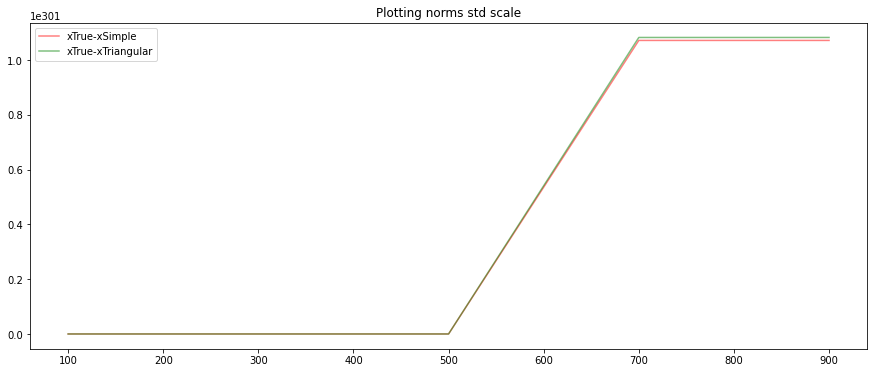

In [15]:
plt.figure(figsize=(15,6))

## Jitter - When two graphs have very similar to the other and they are plotted one after the other, making one disapears
#pyplot.plot(*zip(*normsD), color='blue', label="xSimple - xTriangular", alpha=0.5)
plt.plot(normsSimple2[:,0], normsSimple2[:,1], color='red', label="xTrue-xSimple", alpha=0.5)
plt.plot(normsTrinangular2[:,0], normsTrinangular2[:,1]/0.99, color='green', label="xTrue-xTriangular", alpha=0.5)
# Setting a logarithmic scale for y-axis
plt.legend()
#plt.title("Plotting norms in log scale")
plt.title("Plotting norms std scale")
#plt.yscale('log')
plt.show()

In [16]:
zip(*normsSimple)
x1,x2=zip(*normsSimple)
x3=x2[0]
print(x3)
print(type(x3))

1.127970363406742e+17
<class 'numpy.float64'>


#### we converted the infinity values to a very large number 


In [17]:
print(*zip(*normsD))

(100, 300, 500, 700, 900) (5.541702802335274e+16, 6.548837742442181e+73, 2.7268276945225727e+138, array(1.07150861e+301), array(1.07150861e+301))


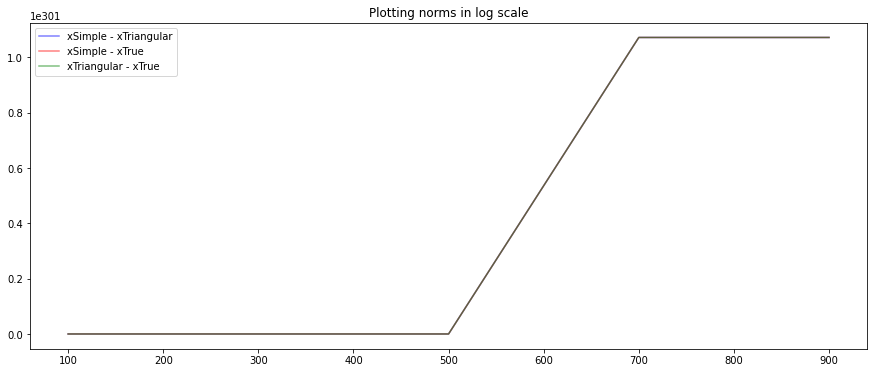

In [18]:
plt.figure(figsize=(15,6))
plt.plot(*zip(*normsD), color='blue', label="xSimple - xTriangular", alpha=0.5)
plt.plot(*zip(*normsSimple), color='red', label="xSimple - xTrue", alpha=0.5)
plt.plot(*zip(*normsTrinangular), color='green', label="xTriangular - xTrue", alpha=0.5)
# Setting a logarithmic scale for y-axis
plt.title("Plotting norms in log scale")
plt.legend()
plt.show()


ax1 ax3


Text(0.5, 1.0, 'Norm')

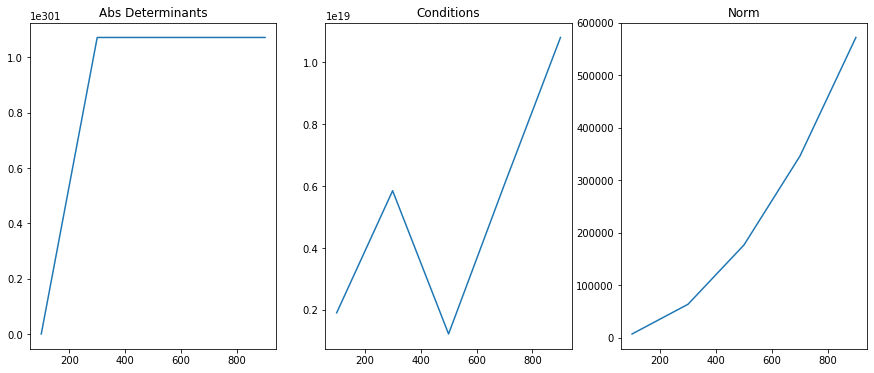

In [19]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

dets2 =np.array(dets).astype(float)
conds2 =np.array(conds).astype(float)
normMatrix2 =np.array(normMatrix).astype(float)

ax1.plot(*zip(*dets))
ax2.plot(*zip(*conds))
ax3.plot(*zip(*normMatrix))
print('ax1','ax3')
#ax1.plot(dets2[:,0], dets2[:,1]); 
ax1.set_title("Abs Determinants")
#ax2.plot(conds2[:,0],conds2[:,1]); 
ax2.set_title("Conditions")
#ax3.plot(normMatrix2[:,0],normMatrix2[:,1]); 
ax3.set_title("Norm")

In [20]:
import pandas as pd

In [21]:
#dets list within a list

dets_array = np.array(dets).astype(np.float)
dets_array_log = np.log(dets_array[:,1])
dets_df1 = pd.DataFrame(dets_array)
dets_df2 = pd.DataFrame(dets_array_log)

In [22]:
dets_df2

,0
0,393.116592
1,693.147181
2,693.147181
3,693.147181
4,693.147181


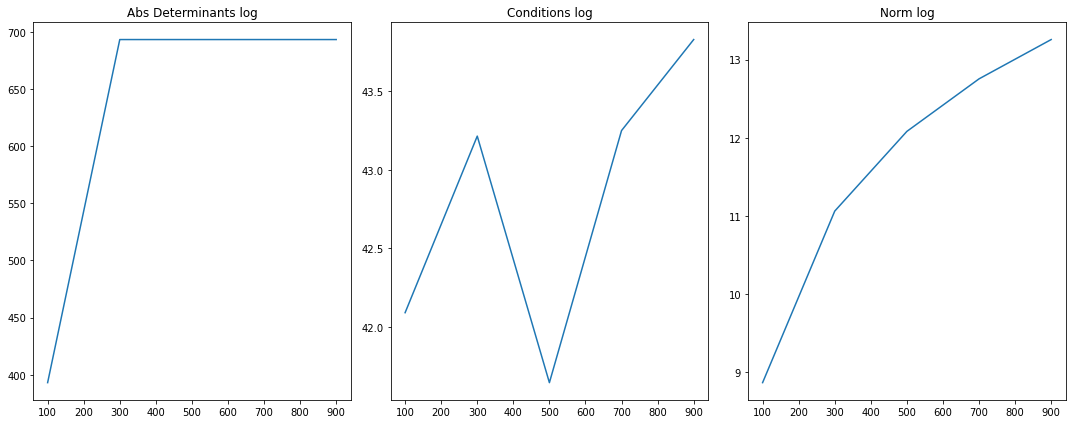

In [23]:
fig, ((ax4, ax5, ax6)) = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

dets_array = np.array(dets).astype(np.float)
dets_array_log = np.log(dets_array[:,1])

conds_array = np.array(conds).astype(np.float)
conds_array_log = np.log(conds_array[:,1])

normMatrix_array = np.array(normMatrix).astype(np.float)
normMatrix_log = np.log(normMatrix_array[:,1])

ax4.plot(dets_array[:,0], dets_array_log); 
ax4.set_title("Abs Determinants log")
ax5.plot(dets_array[:,0], conds_array_log); 
ax5.set_title("Conditions log")
ax6.plot(dets_array[:,0], normMatrix_log); 
ax6.set_title("Norm log")

plt.tight_layout()



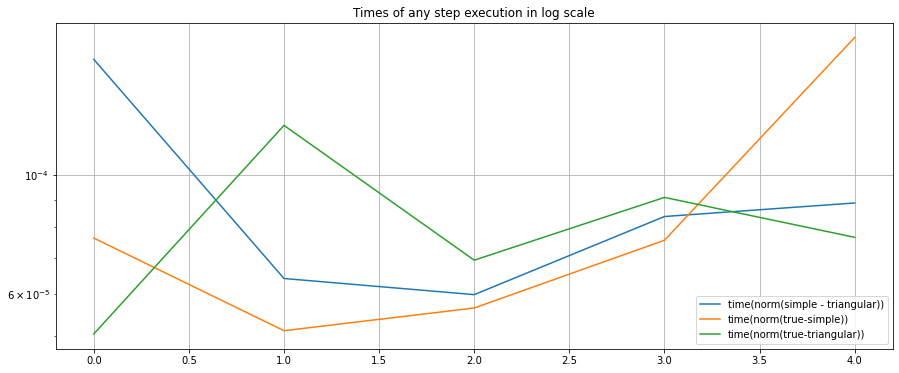

In [24]:
# time plotting

plt.figure(figsize=(15,6))
plt.plot(normTime, label="time(norm(simple - triangular))")
plt.plot(normsSimpleTime, label="time(norm(true-simple))")
plt.plot(normsTrinangularTime, label="time(norm(true-triangular))")
plt.legend()
plt.yscale('log')
plt.title("Times of any step execution in log scale")
plt.grid()

In [25]:

len(detsMatrixTime),len(condsMatrixTime), len(normsMatrixTime)

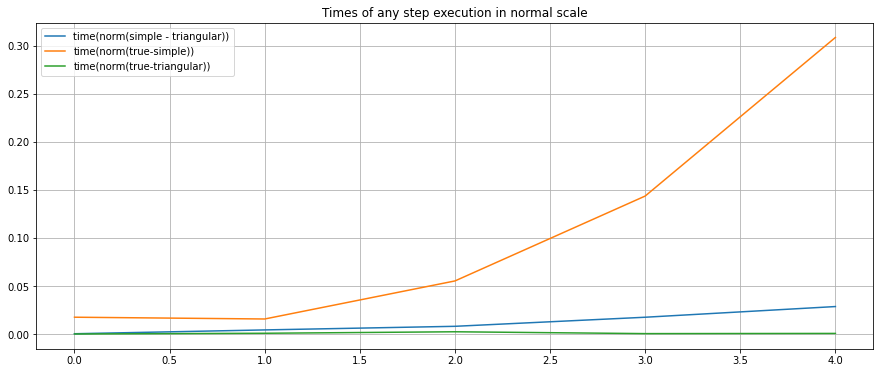

In [26]:
plt.figure(figsize=(15,6))
plt.plot(detsMatrixTime, label="time(norm(simple - triangular))")
plt.plot(condsMatrixTime, label="time(norm(true-simple))")
plt.plot(normsMatrixTime, label="time(norm(true-triangular))")
plt.legend()
# plt.yscale('log')
plt.title("Times of any step execution in normal scale")
plt.grid()